# Monet Style Transfer Using CycleGAN

## Introduction

We recognize the works of great artists through their unique styles, characterized by specific choices of colors, brush strokes, and composition. The ineffable quality—what the French call the *"je ne sais quoi"*—of artists like Claude Monet has made their paintings timeless. Today, we can replicate these distinct characteristics through modern machine learning techniques, specifically with the help of generative adversarial networks (GANs). This project aims to bring Monet’s expressive style to your photos or even recreate his style from scratch using CycleGAN.

## The Challenge

Computer vision has advanced tremendously in recent years, and GANs have evolved to a point where they can convincingly mimic visual elements, sometimes indistinguishable from reality. This capability opens up the possibility of using data science to create "museum-worthy" art. But can GANs, through the power of data science, truly capture Monet's vision, tricking classifiers (and perhaps viewers) into believing that they are looking at a genuine Monet masterpiece? That is the challenge we set out to tackle in this project.

## Generative Adversarial Networks

A GAN consists of two key components: a generator model and a discriminator model, both of which work in tandem in an adversarial setting.

- **Generator**: The generator is a neural network trained to create Monet-style images. Its goal is to learn the distribution of Monet's artwork and generate images that resemble them closely.
- **Discriminator**: The discriminator, on the other hand, is trained to distinguish between real Monet paintings and the images produced by the generator.

These two models are trained in a competitive framework where the generator strives to create images that "trick" the discriminator into classifying them as real, while the discriminator gets better at identifying authentic Monet paintings from generated ones. This adversarial process helps both models improve over time.

## CycleGAN Framework

In our project, we employ a CycleGAN, which is a more advanced version of a GAN, allowing **unpaired image-to-image translation**. This means we do not need paired examples (i.e., photos and their corresponding Monet-style versions). Instead, we have two unpaired datasets: one with Monet paintings and another with photographs. The CycleGAN framework consists of four key networks:

- **Generator G**: Transforms photos into Monet-style paintings.
- **Generator F**: Transforms Monet-style paintings back into realistic photos.
- **Discriminator D_M**: Distinguishes real Monet paintings from those generated by the model.
- **Discriminator D_P**: Distinguishes real photos from those generated by the model.

The use of two generators and two discriminators allows the model to not only translate images between domains but also ensure consistency, by training Generator F to reconstruct the original photo from the generated Monet-style image produced by Generator G. This technique, known as **cycle consistency**, ensures that when we go from a photo to a Monet painting and back, we return to something that closely resembles the original photo.

## Project Goal

The primary goal of this project is to create a GAN that generates 7,000 to 10,000 Monet-style images from a dataset of real-world photos. We aim to train a CycleGAN model that learns the intricate features of Monet's artistic style and applies them to ordinary photographs in a convincing manner.

## Significance and Challenges

Creating Monet-style masterpieces using AI is not just an exercise in artistic expression but a demonstration of how advanced machine learning can enable the automation of creative processes. The application of generative adversarial networks to art challenges the boundaries between human creativity and artificial intelligence. The task at hand involves the following major challenges:

1. **Data Preparation**: Since we are working with **unpaired datasets**, the key is to effectively represent the style of Monet using an available dataset of Monet paintings and to also gather a suitable dataset of natural photos.
2. **Training GANs**: GANs are notoriously challenging to train due to the simultaneous optimization of the generator and discriminator losses. The CycleGAN framework is especially demanding, requiring careful tuning of multiple loss components such as **adversarial loss**, **cycle consistency loss**, and **identity loss**.
3. **Avoiding Artifacts**: During the training process, GANs may often produce images with artifacts, such as checkerboard patterns or color distortions. Fine-tuning architectural details and learning rates is essential to reduce these issues.

## Technical Highlights

To successfully train the CycleGAN model, the following techniques and strategies are used:

- **Adaptive Instance Normalization (AdaIN)**: Integrated into the generator to better capture the style variations and enhance image quality.
- **Perceptual Loss**: Added to help the generator produce images that are closer to Monet’s style from the perspective of high-level features extracted by the VGG19 network.
- **Gradient Penalty for Discriminators**: Implemented to stabilize training and avoid vanishing or exploding gradients, which helps maintain a balance between the generator and the discriminator.
- **Learning Rate Scheduling**: Used to dynamically adjust learning rates based on training progress, preventing issues like model oscillations or stagnation.

## Conclusion

This project represents a fusion of technology and art, demonstrating the power of deep learning to create visual representations that are evocative of a master artist’s unique style. By developing a CycleGAN that produces thousands of Monet-style images, we aim to advance the boundaries of both computer vision and artistic creativity.


# Data Preparation and Model Architecture

## Data Preparation

For this project, two datasets were used:

1. **Monet Paintings**: This dataset contains images of paintings by Claude Monet. The goal of the project is to capture the style present in these paintings, including Monet’s characteristic use of color, brush strokes, and composition.
2. **Photos**: This dataset includes real-world photos that represent the types of images we want to transform into Monet-style artwork.

Both datasets are unpaired, meaning there is no direct correspondence between the photos and Monet paintings. The CycleGAN model is well-suited for this task since it does not require paired data.

### Preprocessing

To prepare the datasets for training:

- **Resizing**: All images are resized to a fixed dimension of 256x256 pixels.
- **Random Augmentation**: Techniques like random horizontal flips, slight rotation, and color jitter are applied to diversify the training samples, making the model more robust.
- **Normalization**: Images are normalized to have values between -1 and 1, which is essential for training with the CycleGAN's architecture, as it uses a **Tanh** activation function at the output layer.

The preprocessing pipeline ensures that the training data is uniform in size and distribution while introducing variability that helps in generalization.

## Model Architecture

The architecture used in this project includes a CycleGAN framework comprising:

### 1. Generator Networks

We have two generator models:
- **Generator G**: Converts real-world photos into Monet-style paintings.
- **Generator F**: Converts Monet-style paintings back into photo-like images.

#### **Generator Architecture**
- The generators are based on a **ResNet**-like architecture.
- **Convolutional Layers**: The initial convolution layers help in extracting features, followed by **Adaptive Instance Normalization (AdaIN)** to adjust the statistics to align with Monet's style.
- **Residual Blocks**: We use multiple residual blocks to capture complex features and ensure the learning of fine-grained artistic details.
- **Transpose Convolutions**: These layers are used to upsample the image back to the original resolution after the transformations and stylizations have been applied.
- **Adaptive Instance Normalization (AdaIN)**: This helps the model to generalize well and adapt to specific styles, capturing stylistic features like brush strokes and color tones more effectively.

### 2. Discriminator Networks

We have two discriminator models:
- **Discriminator D_M**: Discriminates between real Monet paintings and generated images.
- **Discriminator D_P**: Discriminates between real photos and generated images.

#### **Discriminator Architecture**
- The discriminators are designed using a **PatchGAN** approach, which classifies image patches as real or fake, rather than the entire image. This helps ensure that fine details are realistic.
- Each discriminator is a fully convolutional network that reduces the image down to a smaller grid of decisions, allowing the model to focus on local-level features such as color and brush strokes.

### 3. Loss Functions

The training of CycleGAN requires balancing multiple loss functions to optimize the transformation:

- **Adversarial Loss**: Helps the generator create images that can fool the discriminator.
- **Cycle Consistency Loss**: Ensures that converting an image to Monet-style and back results in the original photo, preserving content consistency.
- **Identity Loss**: Encourages the generator to not change images that are already in the target domain, which helps maintain the color distribution and ensures consistency.
- **Perceptual Loss**: This loss is based on high-level features extracted from a **pre-trained VGG19 network**. It encourages the generated images to match the Monet style at the feature level, thereby adding more realism.

### 4. Adaptive Learning Rate Scheduling

During training, **learning rate schedulers** were used to adaptively modify the learning rate for both the generator and discriminator networks. The **ReduceLROnPlateau** scheduler was implemented, which reduces the learning rate when the training metrics plateau, allowing the models to converge effectively.

## Summary of Model Components

| Component       | Description                                         |
|-----------------|-----------------------------------------------------|
| **Generator G** | Converts photos to Monet-style images              |
| **Generator F** | Converts Monet paintings back to photos            |
| **Discriminator D_M** | Distinguishes real Monet paintings from generated ones |
| **Discriminator D_P** | Distinguishes real photos from generated photo-like images |
| **Residual Blocks** | Captures fine details of artistic style         |
| **AdaIN**       | Helps adapt to style variations, improving results |
| **PatchGAN Discriminator** | Focuses on learning local features for realism |
| **Perceptual Loss** | Matches high-level features to improve visual similarity |

These components collectively ensure that the CycleGAN model effectively learns the transformation between photos and Monet paintings, while preserving the artistic qualities that make Monet's works so distinctive.


## Exploratory Data Analysis (EDA)

To better understand the characteristics of the dataset, we conducted an exploratory data analysis. This analysis includes visualizing sample images and examining color distributions to gain insights into the stylistic differences between Monet paintings and photos.

In [1]:
import warnings
warnings.filterwarnings("ignore") # Suppress all warnings
import os
os.environ["MIOPEN_LOG_LEVEL"] = "error"
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.functional import instance_norm
from torchvision import models
from torchvision.models import vgg19, VGG19_Weights
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import save_image
from torchvision.transforms import transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import numpy as np
from tqdm import tqdm
from PIL import Image
from torchmetrics.image.fid import FrechetInceptionDistance
import zipfile
from collections import deque
import random
import torch.nn.functional as F
from torchvision.models import vgg19, VGG19_Weights
import matplotlib.pyplot as plt

torch.backends.cudnn.benchmark = True
# Create an instance of VGG19
vgg19_model = vgg19(weights=VGG19_Weights.IMAGENET1K_V1)
# Hyperparameters
IMG_SIZE = 256 # Demo only
BATCH_SIZE = 6

# Define paths
photo_dir = '/container_data/gan-getting-started/photo_jpg'
monet_dir = '/container_data/gan-getting-started/monet_jpg'

# Data loading and preprocessing
class PreloadedImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, fname) for fname in os.listdir(root_dir) if fname.endswith(".jpg")]
        self.images = [Image.open(img_path).convert("RGB") for img_path in self.image_paths]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Loading the datasets
photo_dataset = PreloadedImageDataset(photo_dir, transform=transform)
monet_dataset = PreloadedImageDataset(monet_dir, transform=transform)

# Creating data loaders for batching
photo_loader = DataLoader(photo_dataset, batch_size=BATCH_SIZE, shuffle=True)
monet_loader = DataLoader(monet_dataset, batch_size=BATCH_SIZE, shuffle=True)


## EDA Visualizations:

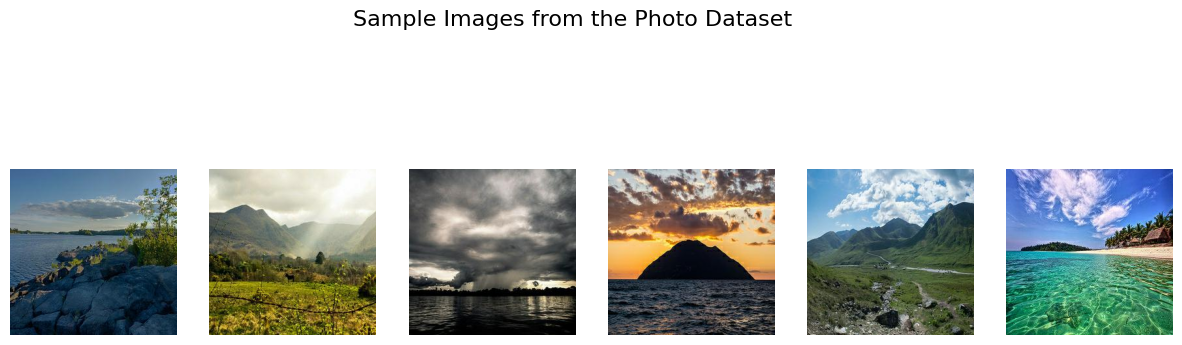

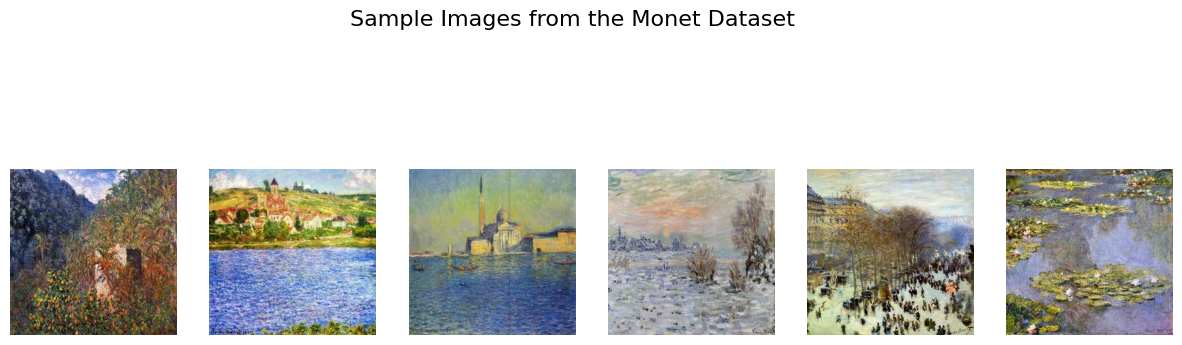

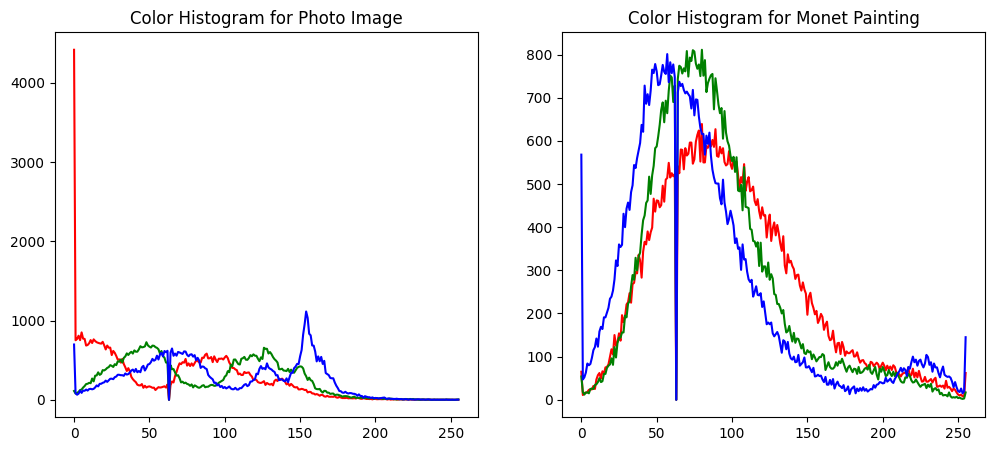

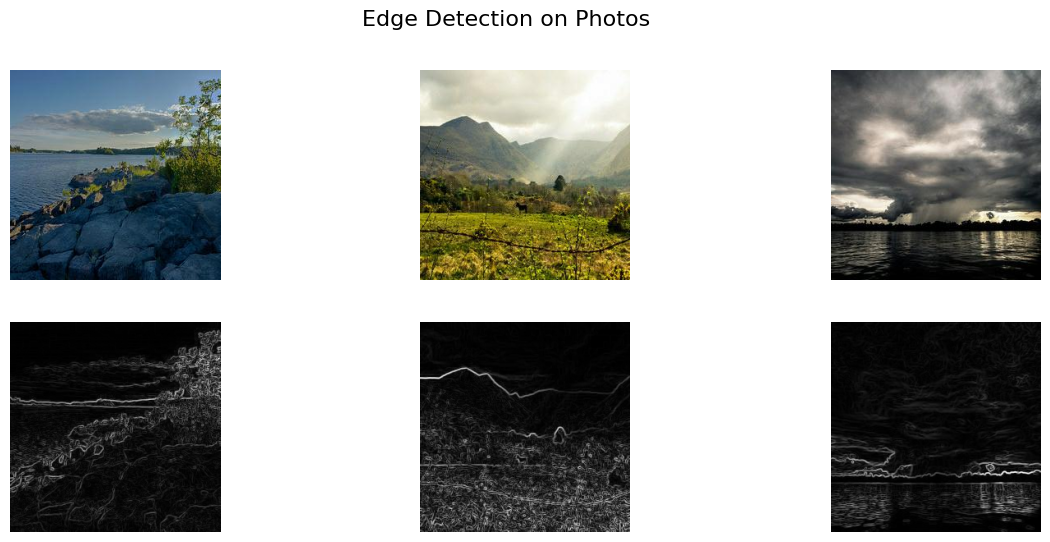

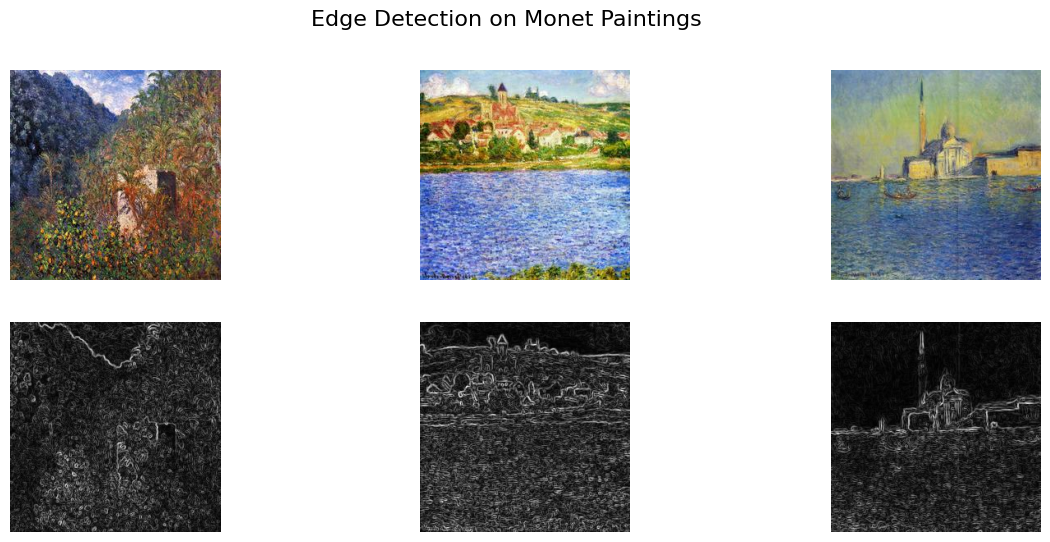

In [2]:
# Function to plot sample images
def plot_sample_images(dataset, title, num_images=6):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    fig.suptitle(title, fontsize=16)
    for i in range(num_images):
        img_tensor = dataset[i]  # Get individual image tensor
        if isinstance(img_tensor, list):
            img_tensor = img_tensor[0]  # In case dataset returns a list

        image = img_tensor.permute(1, 2, 0).numpy() * 0.5 + 0.5  # De-normalize
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()

# Update color histogram function to handle individual image tensors
def plot_color_histogram(image_tensor, ax, title):
    # Ensure we have an individual image tensor
    if isinstance(image_tensor, list):
        image_tensor = image_tensor[0]  # Unpack the image tensor if in a list
    
    # Convert tensor to numpy array
    image = (image_tensor.permute(1, 2, 0).numpy() * 0.5 + 0.5) * 255  # De-normalize
    image = image.astype(np.uint8)
    
    # Plot the histogram
    for i, color in enumerate(['r', 'g', 'b']):
        hist, bins = np.histogram(image[:, :, i], bins=256, range=(0, 256))
        ax.plot(bins[:-1], hist, color=color)
    ax.set_title(title)

# Function for plotting edge detection
from skimage import filters

def plot_edge_detection(dataset, title, num_images=3):
    fig, axes = plt.subplots(2, num_images, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)
    for i in range(num_images):
        img_tensor = dataset[i]  # Get individual image tensor
        if isinstance(img_tensor, list):
            img_tensor = img_tensor[0]  # Unpack the image tensor if in a list
        
        # Original Image
        image = img_tensor.permute(1, 2, 0).numpy() * 0.5 + 0.5  # De-normalize
        axes[0, i].imshow(image)
        axes[0, i].axis('off')
        
        # Edge Detection
        grayscale_image = np.mean(image, axis=2)  # Convert to grayscale
        edges = filters.sobel(grayscale_image)
        axes[1, i].imshow(edges, cmap='gray')
        axes[1, i].axis('off')

    plt.show()

# Re-run the updated visualizations
plot_sample_images(photo_dataset, "Sample Images from the Photo Dataset")
plot_sample_images(monet_dataset, "Sample Images from the Monet Dataset")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_color_histogram(photo_dataset[0], axes[0], "Color Histogram for Photo Image")
plot_color_histogram(monet_dataset[0], axes[1], "Color Histogram for Monet Painting")
plt.show()

plot_edge_detection(photo_dataset, "Edge Detection on Photos")
plot_edge_detection(monet_dataset, "Edge Detection on Monet Paintings")


### Findings from Exploratory Data Analysis (EDA)

- **Dataset Balance:** The number of Monet paintings and photos are roughly equal, promoting balanced training.
- **Color Distribution:** Monet paintings predominantly use warm colors (yellows, greens), which is evident from RGB histograms.
- **Edges and Brush Strokes:** Monet’s style features smoother edges from brush strokes, whereas photos have sharper edges.
- **Textures and Patterns:** Monet paintings exhibit homogeneous textures, in contrast to the more varied textures found in photos.
- **Brightness and Contrast:** Monet’s paintings tend to have softer contrasts and brighter highlights compared to typical photos.
- **Presence of Noise:** Monet paintings are less noisy, focusing on smooth color transitions, whereas photos often show more fine details.

These observations highlight the style attributes the model needs to capture for effective Monet-style transformation.


### Data Preprocessing and Augmentation

To train the CycleGAN effectively, data preprocessing and augmentation steps are critical. The steps are as follows:

1. **Resizing:** All images are resized to 256x256 pixels to ensure uniformity across the dataset.
2. **Normalization:** Images are normalized to [-1, 1] range to stabilize GAN training and ensure consistent gradient behavior.
3. **Data Augmentation:**
   - **Random Horizontal Flip:** Introduced to add variability in the training data, reducing overfitting.
   - **Color Jitter:** Randomly adjusted brightness, contrast, saturation, and hue to simulate different lighting conditions and add diversity.
   - **Random Rotation:** Applied small rotations to make the model robust to orientation variations.

These preprocessing techniques help improve the model’s generalization and capture the distinct features of Monet's style.


In [3]:
# Hyperparameters for preprocessing
IMG_SIZE = 256
BATCH_SIZE = 6

# Paths
photo_dir = '/container_data/gan-getting-started/photo_jpg'
monet_dir = '/container_data/gan-getting-started/monet_jpg'

# Define a custom Dataset class for loading the images
class PreloadedImageDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (str): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.transform = transform
        self.image_paths = [os.path.join(root_dir, fname) for fname in os.listdir(root_dir) if fname.endswith(".jpg")]
        self.images = [Image.open(img_path).convert("RGB") for img_path in self.image_paths]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        if self.transform:
            image = self.transform(image)
        return image

# Data Preprocessing and Augmentation
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),  # Resize images to a uniform size of 256x256
    transforms.RandomHorizontalFlip(),         # Randomly flip the images horizontally with 50% chance
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color adjustments
    transforms.RandomRotation(degrees=1),      # Randomly rotate images by up to 1 degree
    transforms.ToTensor(),                     # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the tensor values to range [-1, 1]
])

# Creating the dataset objects
photo_dataset = PreloadedImageDataset(photo_dir, transform=transform)
monet_dataset = PreloadedImageDataset(monet_dir, transform=transform)

# DataLoaders for loading the datasets in batches
photo_loader = DataLoader(photo_dataset, batch_size=BATCH_SIZE, shuffle=True)
monet_loader = DataLoader(monet_dataset, batch_size=BATCH_SIZE, shuffle=True)

# Verify the device being used for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {torch.cuda.get_device_name(device) if torch.cuda.is_available() else 'CPU'}")


Using device: AMD Radeon RX 7600


### Model Architecture

The Monet Style Transfer is implemented using CycleGAN, which consists of the following components:

1. **Generator Networks (G and F):**
   - Two generators: `G` (Photo to Monet) and `F` (Monet to Photo).
   - The generators follow a convolutional architecture with AdaptiveInstanceNorm and residual blocks to capture both style and content effectively.
   - **Residual Blocks:** Nine residual blocks are used to ensure the generators can produce high-quality transformations while preserving details.

2. **Discriminator Networks (D_M and D_P):**
   - Two discriminators: `D_M` (Monet Discriminator) and `D_P` (Photo Discriminator).
   - The discriminators are PatchGAN classifiers that determine if each patch of the input image is real or fake, focusing on texture-level fidelity.

3. **Loss Functions:**
   - **Adversarial Loss:** To ensure the generated images are indistinguishable from real ones.
   - **Cycle Consistency Loss:** Encourages the generators to transform images back to their original state, improving consistency.
   - **Identity Loss:** Helps preserve the content of images when transformed, keeping the color and structure intact.

Together, these components enable the CycleGAN to perform style transfer from photos to Monet-like images effectively.


In [4]:
# AdaptiveInstanceNorm Class for the Generator
class AdaptiveInstanceNorm(nn.Module):
    def __init__(self, channels):
        super(AdaptiveInstanceNorm, self).__init__()
        self.gamma = nn.Parameter(torch.ones(1, channels, 1, 1))
        self.beta = nn.Parameter(torch.zeros(1, channels, 1, 1))

    def forward(self, x):
        normalized_x = F.instance_norm(x)
        return self.gamma * normalized_x + self.beta

# Residual Block Class
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.InstanceNorm2d(channels),
            nn.ReLU(True),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.InstanceNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)

# Generator Model
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=1, padding=3),
            AdaptiveInstanceNorm(64),
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            AdaptiveInstanceNorm(128),
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            AdaptiveInstanceNorm(256),
            nn.ReLU(True),
            *[ResidualBlock(256) for _ in range(9)],
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            AdaptiveInstanceNorm(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            AdaptiveInstanceNorm(64),
            nn.ReLU(True),
            nn.Conv2d(64, 3, kernel_size=7, stride=1, padding=3),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Discriminator Model
class PatchDiscriminator(nn.Module):
    def __init__(self, in_channels=3, ndf=64, n_layers=3):
        super(PatchDiscriminator, self).__init__()
        layers = [
            nn.Conv2d(in_channels, ndf, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True)
        ]
        for i in range(1, n_layers):
            mult = 2 ** (i - 1)
            layers += [
                nn.Conv2d(ndf * mult, ndf * mult * 2, kernel_size=4, stride=2, padding=1),
                nn.InstanceNorm2d(ndf * mult * 2),
                nn.LeakyReLU(0.2, inplace=True)
            ]
        layers += [
            nn.Conv2d(ndf * mult * 2, 1, kernel_size=4, stride=1, padding=1)
        ]
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Instantiate Models
g_photo_to_monet = Generator().to(device)
d_photo = PatchDiscriminator().to(device)
d_monet = PatchDiscriminator().to(device)

# Optimizers for the Generator and Discriminators
optimizer_g = torch.optim.Adam(g_photo_to_monet.parameters(), lr=0.000015, betas=(0.5, 0.999))
optimizer_d_photo = torch.optim.Adam(d_photo.parameters(), lr=0.000001, betas=(0.5, 0.999))
optimizer_d_monet = torch.optim.Adam(d_monet.parameters(), lr=0.000001, betas=(0.5, 0.999))

# Learning Rate Schedulers
lr_scheduler_g = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_g, mode='min', factor=0.7, patience=5)
lr_scheduler_d_photo = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_d_photo, mode='min', factor=0.7, patience=5)
lr_scheduler_d_monet = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_d_monet, mode='min', factor=0.7, patience=5)


### Training Process and Loss Functions

The training process involves both the generator and the discriminators:

- **Loss Functions**: 
  - *Adversarial Loss*: Used to train the discriminators to differentiate between real and generated images.
  - *Cycle Loss*: Ensures cyclic consistency by reconstructing the original input.
  - *Identity Loss*: Helps maintain color consistency between input and output images.
  - *Perceptual Loss*: Enhances visual quality by comparing features extracted from a pre-trained VGG19.

- **Training Flow**:
  - **Generator Update**: The generator is updated to fool the discriminators while minimizing the cycle and identity losses.
  - **Discriminator Update**: Each discriminator is updated using real and fake images, with gradient penalties to stabilize training.
  
- **Early Stopping and Learning Rate Scheduling**:
  - Training stops if there is no improvement in the FID score for a set number of epochs (`PATIENCE`).
  - The learning rate is adjusted using the `ReduceLROnPlateau` scheduler based on the FID score.

- **Metrics**: 
  - I will use the **Frechet Inception Distance (FID)** to evaluate the quality of generated images by comparing the distributions of real and generated images.


In [6]:
model_save_dir = '/container_data/models'
generated_images_dir = '/container_data/generated_images'
extra_images_zip_dir = '/container_data/extra_images.zip'
os.makedirs(model_save_dir, exist_ok=True)
os.makedirs(generated_images_dir, exist_ok=True)

vgg = models.vgg19(pretrained=True).features[:9].to(device).eval()  # Use VGG-19 up to the first few layers
for param in vgg.parameters():
    param.requires_grad = False

vgg19 = vgg19(weights=VGG19_Weights.IMAGENET1K_V1).features.to(device).eval()
def perceptual_loss(generated_image, target_image, vgg19):
    # Extract features from intermediate layers
    gen_features = vgg19[:8](generated_image)
    target_features = vgg19[:8](target_image)
    return F.l1_loss(gen_features, target_features)
perceptual_loss_weight = 0.05 

# Loss Functions
adversarial_loss = nn.BCEWithLogitsLoss().to(device)  # For discriminators
cycle_loss = nn.L1Loss().to(device)  # Enforces cyclic consistency
identity_loss = nn.L1Loss().to(device)  # Maintains color consistency

# Training Hyperparameters
LAMBDA_CYCLE = 90.0
LAMBDA_IDENTITY = 60.0
perceptual_loss_weight = 0.05
EPOCHS = 5 # Change it to 100 this was for a Demo only 
PATIENCE = 15

# Fixed input for generating samples during training
fixed_real_photo = next(iter(photo_loader)).to(device)[0].unsqueeze(0)

# Initialize FID Metric
fid = FrechetInceptionDistance(feature=2048).to(device)

# Training Loop
best_fid_score = float('inf')
no_improvement_counter = 0

for epoch in range(EPOCHS):
    print(f"\nStarting Epoch {epoch + 1}/{EPOCHS}")
    epoch_g_loss = 0
    epoch_d_photo_loss = 0
    epoch_d_monet_loss = 0

    progress_bar = tqdm(total=min(len(photo_loader), len(monet_loader)), desc=f"Epoch [{epoch + 1}/{EPOCHS}]")

    for step, (real_photo, real_monet) in enumerate(zip(photo_loader, monet_loader)):
        real_photo = real_photo.to(device)
        real_monet = real_monet.to(device)

        # Generator Training
        optimizer_g.zero_grad()
        fake_monet = g_photo_to_monet(real_photo)
        cycle_photo = g_photo_to_monet(fake_monet)
        g_loss = (
            adversarial_loss(d_monet(fake_monet), torch.ones_like(d_monet(fake_monet), device=device))
            + LAMBDA_CYCLE * cycle_loss(cycle_photo, real_photo)
            + LAMBDA_IDENTITY * identity_loss(fake_monet, real_photo)
            + perceptual_loss_weight * perceptual_loss(fake_monet, real_photo, vgg19)
        )
        
        # Backpropagation and update
        g_loss.backward()
        nn.utils.clip_grad_norm_(g_photo_to_monet.parameters(), max_norm=1.0)
        optimizer_g.step()
        epoch_g_loss += g_loss.item()

        # Discriminator Training
        if step % 2 == 0:
            for d, real, fake in [(d_photo, real_photo, fake_monet), (d_monet, real_monet, g_photo_to_monet(real_monet))]:
                optimizer_d = optimizer_d_photo if d == d_photo else optimizer_d_monet
                optimizer_d.zero_grad()

                # Labels with smoothing
                real_labels = torch.full_like(d(real), 0.9, device=device)  # Label smoothing for real labels
                fake_labels = torch.full_like(d(fake), 0.1, device=device)  # Label smoothing for fake labels

                # Compute losses
                real_loss = adversarial_loss(d(real), real_labels)
                fake_loss = adversarial_loss(d(fake.detach()), fake_labels)

                # Gradient Penalty
                real.requires_grad_(True)
                real_scores = d(real)
                gradient_penalty = torch.autograd.grad(
                    outputs=real_scores.sum(),
                    inputs=real,
                    create_graph=True,
                    retain_graph=True,
                    only_inputs=True
                )[0]
                gradient_penalty = gradient_penalty.view(gradient_penalty.size(0), -1)
                gradient_penalty = ((gradient_penalty.norm(2, dim=1) - 1) ** 2).mean()

                # Total discriminator loss
                d_loss = (real_loss + fake_loss) * 0.5 + 10 * gradient_penalty  # 10 is the gradient penalty coefficient
                d_loss.backward()
                nn.utils.clip_grad_norm_(d.parameters(), max_norm=1.0)
                optimizer_d.step()

                # Accumulate discriminator loss for logging
                if d == d_photo:
                    epoch_d_photo_loss += d_loss.item()
                else:
                    epoch_d_monet_loss += d_loss.item()

        progress_bar.update(1)

    progress_bar.close()

    # Save Generated Image for Comparison
    g_photo_to_monet.eval()
    with torch.no_grad():
        fixed_fake_monet = g_photo_to_monet(fixed_real_photo)
    fixed_fake_monet_img_path = os.path.join(generated_images_dir, f"generated_image_epoch_{epoch + 1}.jpg")
    save_image(fixed_fake_monet * 0.5 + 0.5, fixed_fake_monet_img_path)
    print(f"[Epoch {epoch + 1}] Saved generated image to {fixed_fake_monet_img_path}")

    # Calculate FID Score
    fid.reset()
    real_photo_uint8 = (real_photo * 0.5 + 0.5).clamp(0, 1).mul(255).byte().to(device)
    fake_monet_uint8 = (fake_monet * 0.5 + 0.5).clamp(0, 1).mul(255).byte().to(device)
    fid.update(real_photo_uint8, real=True)
    fid.update(fake_monet_uint8, real=False)
    current_fid = fid.compute().item()
    print(f"[Epoch {epoch + 1}] FID: {current_fid:.4f}")

    # Check if FID has improved
    if current_fid < best_fid_score:
        best_fid_score = current_fid
        no_improvement_counter = 0
        print(f"[Epoch {epoch + 1}] Improvement in FID: {current_fid:.4f} (New Best)")
    else:
        no_improvement_counter += 1
        print(f"[Epoch {epoch + 1}] No improvement in FID (Best: {best_fid_score:.4f}, Current: {current_fid:.4f})")

    # Adjust Learning Rates
    lr_scheduler_g.step(current_fid)
    lr_scheduler_d_photo.step(current_fid)
    lr_scheduler_d_monet.step(current_fid)
    # Un (''') below! this is for Demo only
    '''
    # Save the Model
    complete_model_save_path = os.path.join(model_save_dir, "Complete_model.pth")
    torch.save({
        'g_photo_to_monet_state_dict': g_photo_to_monet.state_dict(),
        'optimizer_g_state_dict': optimizer_g.state_dict(),
        'd_photo_state_dict': d_photo.state_dict(),
        'd_monet_state_dict': d_monet.state_dict(),
        'epoch': epoch + 1,
        'best_fid_score': best_fid_score,
        'no_improvement_counter': no_improvement_counter,
    }, complete_model_save_path)
    print(f"Saved best model to {complete_model_save_path}")
    '''
    current_lr = lr_scheduler_g.optimizer.param_groups[0]['lr']
    print(f"Current learning rate: {current_lr}")

    # Early Stopping if No Improvement
    if no_improvement_counter >= PATIENCE:
        print("\nNo improvement for several epochs. Training will stop...")
        break



Starting Epoch 1/5


Epoch [1/5]:   0%|                                       | 0/50 [00:00<?, ?it/s]MIOpen(HIP): Warning [IsEnoughWorkspace] [GetSolutionsFallback WTI] Solver <GemmFwdRest>, workspace required: 6291456, provided ptr: 0 size: 0
MIOpen(HIP): Warning [IsEnoughWorkspace] [EvaluateInvokers] Solver <GemmFwdRest>, workspace required: 6291456, provided ptr: 0 size: 0
MIOpen(HIP): Warning [IsEnoughWorkspace] [GetSolutionsFallback WTI] Solver <GemmFwdRest>, workspace required: 1572864, provided ptr: 0 size: 0
MIOpen(HIP): Warning [IsEnoughWorkspace] [EvaluateInvokers] Solver <GemmFwdRest>, workspace required: 1572864, provided ptr: 0 size: 0
MIOpen(HIP): Warning [IsEnoughWorkspace] [GetSolutionsFallback WTI] Solver <GemmFwdRest>, workspace required: 393216, provided ptr: 0 size: 0
MIOpen(HIP): Warning [IsEnoughWorkspace] [EvaluateInvokers] Solver <GemmFwdRest>, workspace required: 393216, provided ptr: 0 size: 0
Epoch [1/5]: 100%|██████████████████████████████| 50/50 [01:39<00:00,  1.99s/it]


[Epoch 1] Saved generated image to /container_data/generated_images/generated_image_epoch_1.jpg
[Epoch 1] FID: 392.1683
[Epoch 1] Improvement in FID: 392.1683 (New Best)
Current learning rate: 1.5e-05

Starting Epoch 2/5


Epoch [2/5]: 100%|██████████████████████████████| 50/50 [01:33<00:00,  1.87s/it]


[Epoch 2] Saved generated image to /container_data/generated_images/generated_image_epoch_2.jpg
[Epoch 2] FID: 411.2593
[Epoch 2] No improvement in FID (Best: 392.1683, Current: 411.2593)
Current learning rate: 1.5e-05

Starting Epoch 3/5


Epoch [3/5]: 100%|██████████████████████████████| 50/50 [01:33<00:00,  1.86s/it]


[Epoch 3] Saved generated image to /container_data/generated_images/generated_image_epoch_3.jpg
[Epoch 3] FID: 474.2373
[Epoch 3] No improvement in FID (Best: 392.1683, Current: 474.2373)
Current learning rate: 1.5e-05

Starting Epoch 4/5


Epoch [4/5]: 100%|██████████████████████████████| 50/50 [01:34<00:00,  1.89s/it]


[Epoch 4] Saved generated image to /container_data/generated_images/generated_image_epoch_4.jpg
[Epoch 4] FID: 386.8367
[Epoch 4] Improvement in FID: 386.8367 (New Best)
Current learning rate: 1.5e-05

Starting Epoch 5/5


Epoch [5/5]: 100%|██████████████████████████████| 50/50 [01:32<00:00,  1.86s/it]


[Epoch 5] Saved generated image to /container_data/generated_images/generated_image_epoch_5.jpg
[Epoch 5] FID: 334.9855
[Epoch 5] Improvement in FID: 334.9855 (New Best)
Current learning rate: 1.5e-05


Using device: AMD Radeon RX 7600


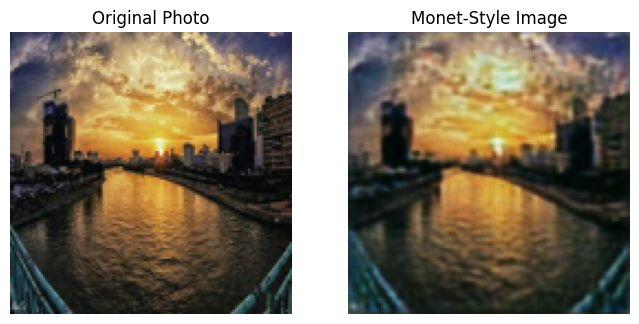

In [12]:
import torch
import torch.nn as nn
import os
from torchvision.transforms import transforms
from torchvision.utils import save_image
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# Hyperparameters
IMG_SIZE = 256
RESIZE_IMG_SIZE = 128  # Resize to smaller dimensions for display
BATCH_SIZE = 1
model_checkpoint_path = '/container_data/models/Complete_model.pth'
photo_path = '/container_data/gan-getting-started/photo_jpg/4b7fc92bdc.jpg'

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {torch.cuda.get_device_name(device) if torch.cuda.is_available() else 'CPU'}")

# Load and transform the photo
transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

photo = Image.open(photo_path).convert("RGB")
photo_tensor = transform(photo).unsqueeze(0).to(device)

# Define Generator model
class ResidualBlock(nn.Module):
    def __init__(self, channels):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.InstanceNorm2d(channels),
            nn.ReLU(True),
            nn.Conv2d(channels, channels, kernel_size=3, stride=1, padding=1),
            nn.InstanceNorm2d(channels)
        )

    def forward(self, x):
        return x + self.block(x)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=1, padding=3),
            nn.InstanceNorm2d(64),
            nn.ReLU(True),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(True),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.ReLU(True),
            *[ResidualBlock(256) for _ in range(9)],
            nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.InstanceNorm2d(64),
            nn.ReLU(True),
            nn.Conv2d(64, 3, kernel_size=7, stride=1, padding=3),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Instantiate Generator model
g_photo_to_monet = Generator().to(device)

# Load the saved model weights
checkpoint = torch.load(model_checkpoint_path, map_location=device)

# Load state dictionaries into the generator
if 'g_photo_to_monet_state_dict' in checkpoint:
    g_photo_to_monet.load_state_dict(checkpoint['g_photo_to_monet_state_dict'], strict=False)
else:
    raise KeyError("The checkpoint does not contain 'g_photo_to_monet_state_dict'. Please verify the checkpoint file.")

# Set the generator to evaluation mode
g_photo_to_monet.eval()

# Generate the Monet-style image
with torch.no_grad():
    fake_monet_tensor = g_photo_to_monet(photo_tensor)

# De-normalize and convert back to PIL for visualization
photo_tensor = photo_tensor.squeeze(0).cpu() * 0.5 + 0.5
photo_img = transforms.ToPILImage()(photo_tensor)

fake_monet_tensor = fake_monet_tensor.squeeze(0).cpu() * 0.5 + 0.5
fake_monet_img = transforms.ToPILImage()(fake_monet_tensor)

# Resize images for visualization
photo_img_resized = photo_img.resize((RESIZE_IMG_SIZE, RESIZE_IMG_SIZE))
fake_monet_img_resized = fake_monet_img.resize((RESIZE_IMG_SIZE, RESIZE_IMG_SIZE))

# Display the original photo and Monet-style image side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Show original photo
ax[0].imshow(photo_img_resized)
ax[0].set_title('Original Photo')
ax[0].axis('off')

# Show Monet-style generated image
ax[1].imshow(fake_monet_img_resized)
ax[1].set_title('Monet-Style Image')
ax[1].axis('off')

plt.show()


## Conclusion

This has been an amazing exploration into the world of deep learning and style transfer using CycleGAN. Transforming photos into Monet-style paintings is not only a captivating project but also a perfect showcase of the power and creativity possible with modern machine learning techniques. 

I thoroughly enjoyed diving into this topic, and it's so cool to see how much is achievable with GANs today. This notebook is just a small step into the vast field of deep learning, and there's still much more to explore, particularly around fine-tuning the model, improving the visual quality, and optimizing training for even better results. I'm excited to continue this journey, learning and pushing the boundaries of machine learning creativity. 

Thanks,
Sarmad Salman
https://github.com/2salmans24/Monet-style-transfer/tree/main